# CHAPTER-3 (DISCRETE TIME FOURIER TRANSFORM)

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install Scipy

Note: you may need to restart the kernel to use updated packages.


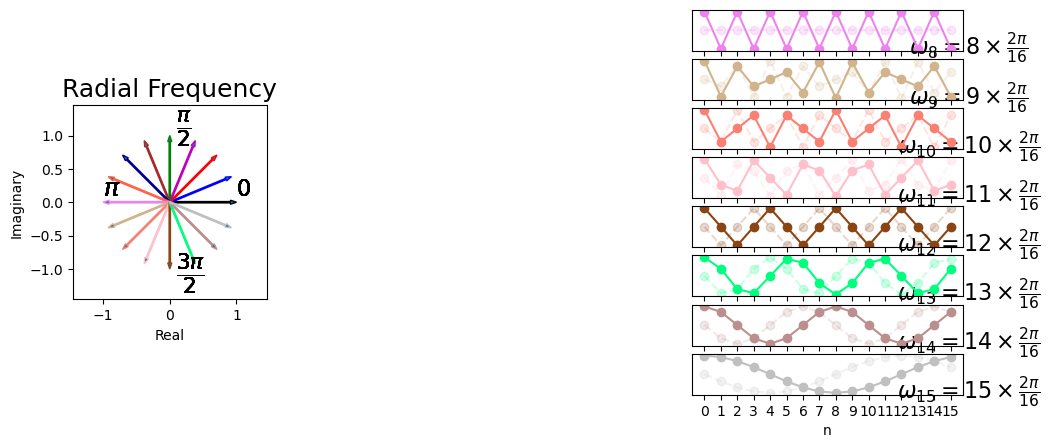

In [6]:
#3.1
# must start notebook with --pylab flag
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.gridspec as gridspec
from math import sqrt
def dftmatrix(Nfft=32,N=None):
    'construct DFT matrix'
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n=np.arange(N)
    U =np.matrix(np.exp(1j* 2*np.pi/Nfft *k*n[:,None])) # use numpy broadcasting tocreate matrix 
    return U/sqrt(Nfft)
Nfft=16
v =np.ones((16,1))
U = dftmatrix(Nfft=Nfft,N=16)
# ---
 # hardcoded constants to format complicated figure
gs=gridspec.GridSpec(8,12)
gs.update( wspace=1, left=0.01)
fig =plt.figure(figsize=(10,5))
ax0 =plt.subplot(gs[:,:3])
fig.add_subplot(ax0)
ax0.set_aspect(1)
a=2*np.pi/Nfft*np.arange(Nfft)
colors = ['k','b','r','m','g','Brown','DarkBlue','Tomato','Violet','Tan','Salmon','Pink','SaddleBrown', 'SpringGreen', 'RosyBrown','Silver']
for j,i in enumerate(a):
              ax0.add_patch(FancyArrow(0,0,np.cos(i),np.sin(i),width=0.02,
                                       length_includes_head=True,edgecolor=colors[j]))
              ax0.text(1,0.1,'0',fontsize=16)
              ax0.text(0.1,1,r'$\frac{\pi}{2}$',fontsize=22)
              ax0.text(-1,0.1,r'$\pi$',fontsize=18)
              ax0.text(0.1,-1.2,r'$\frac{3\pi}{2}$',fontsize=22)
              ax0.axis(np.array([-1,1,-1,1])*1.45)
              ax0.set_title('Radial Frequency',fontsize=18)
              ax0.set_xlabel('Real')
              ax0.set_ylabel('Imaginary')
# plots in the far right column
for i in range(8):
    ax=plt.subplot(gs[i,8:])
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_ylabel(r'$\omega_{%d}=%d\times\frac{2\pi}{16}$'%(i+8,i+8),fontsize=16,rotation='horizontal')
    ax.plot(U.real[:,i+8],'-o',color=colors[i+8])
    ax.plot(U.imag[:,i+8],'--o',color=colors[i+8],alpha=0.2)
    ax.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)
    ax.yaxis.set_label_position('right')
    ax.set_xticks(np.arange(16))
    ax.set_xlabel('n')

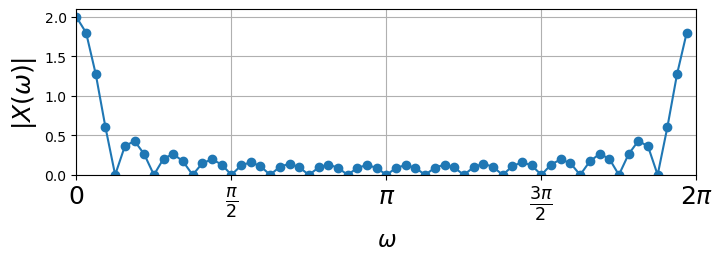

In [7]:
#3.2
U = dftmatrix(64,16)
x =np.ones((16,1))
X = U.H*x
fig,ax=plt.subplots()
fig.set_size_inches((8,4))
ax.set_aspect(0.8)
ax.grid()
ax.plot(np.arange(0,64)*2*np.pi/64.,abs(X),'o-')
ax.set_ylabel(r'$|X(\omega)|$',fontsize=18)
ax.set_xticks([0,np.pi/2.,np.pi, 3*np.pi/2,2*np.pi])
ax.set_xlabel(r'$\omega$',fontsize=16)
ax.axis([0, 2*np.pi,0,2.1])
ax.set_xticklabels(['0',r'$\frac{\pi}{2}$', r'$\pi$',r'$\frac{3\pi}{2}$',r'$2\pi$'], fontsize=18);

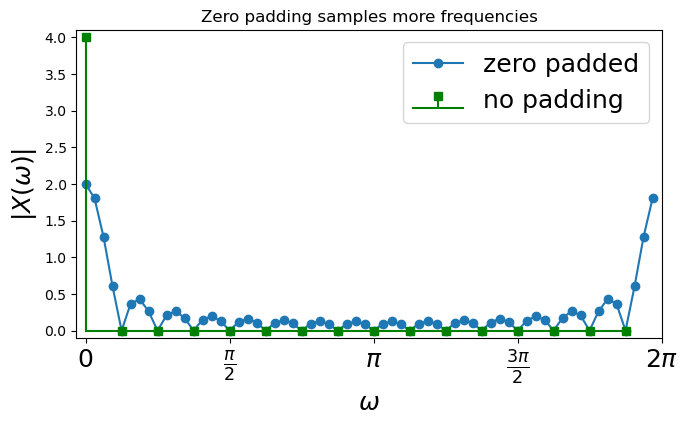

In [8]:
#3.3
U = dftmatrix(64,16)
x =np.ones((16,1))
X = U.H*x
fig,ax=plt.subplots()
fig.set_size_inches((8,4))
ax.set_aspect(0.8) # aspect ratio
ax.plot(np.arange(0,64)*2*np.pi/64.,abs(X),'o-',label='zero padded')
ax.stem(np.arange(0,16)*2*np.pi/16.,abs(dftmatrix(16).H*x),
        markerfmt='gs', basefmt='g-',linefmt='g-',label='no padding')
ax.set_xlabel(r'$\omega$',fontsize=18)
ax.set_ylabel(r'$|X(\omega)|$',fontsize=18)
ax.set_xticks([0,np.pi/2.,np.pi, 3*np.pi/2,2*np.pi])
ax.axis([-.1, 2*np.pi,-.1,4.1])
ax.legend(loc=0,fontsize=18)
ax.set_xticklabels(['0',r'$\frac{\pi}{2}$', r'$\pi$',r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=18);
ax.set_title('Zero padding samples more frequencies');

Text(0.5, 1.0, '$\\omega=\\frac{2\\pi 5}{16}$')

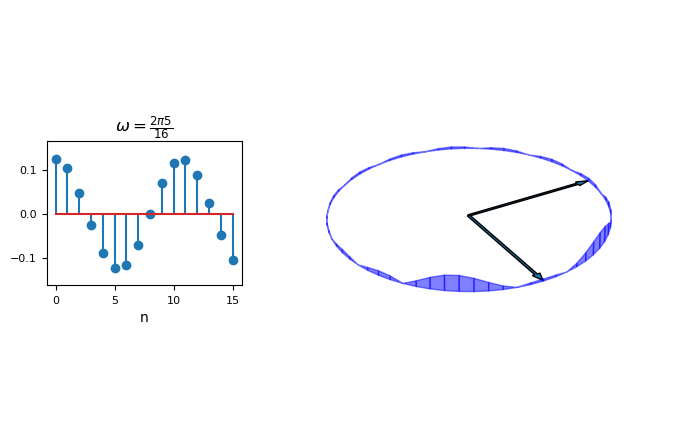

In [12]:
#3.4
from matplotlib.patches import FancyArrow
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.gridspec as gridspec
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
def facet_filled(x,alpha=0.5,color="b"):
    a,b=x
    a0= a*np.array([1,1,0])
    b0= b*np.array([1,1,0])
    ve = np.vstack([a,a0,b0,b])
    poly = Poly3DCollection([ve])
    poly.set_alpha(alpha)
    poly.set_color(color)
    return poly
def drawDFTView(X,ax=None,fig=None):
    a=2*np.pi/len(X)*np.arange(len(X))
    d=np.vstack([np.cos(a),np.sin(a),np.array(abs(X)).flatten()]).T
    if ax is None and fig is None:
       if ax is None and fig is None:
        fig = plt.figure()
        fig.set_size_inches(6,6)
    if ax is None:
       ax = fig.add_subplot(1, 1, 1, projection="3d")
    ax.axis([-1,1,-1,1])
    ax.set_zlim([0,d[:,2].max()])
    ax.set_aspect('equal')
    ax.view_init(azim=-30)
    a=FancyArrow(0,0,1,0,width=0.02,length_includes_head=True)
    ax.add_patch(a)
    b=FancyArrow(0,0,0,1,width=0.02,length_includes_head=True)
    ax.add_patch(b)
    art3d.patch_2d_to_3d(a)
    art3d.patch_2d_to_3d(b)
    ax.axis("off")
    sl=[slice(i,i+2) for i in range(d.shape[0]-2)]
    for s in sl:
        poly=facet_filled(d[s,:])
        ax.add_collection3d(poly)
    ax.add_collection3d(facet_filled(d[[-1,0],:])) 
    ax.add_collection3d(facet_filled(d[[-2,-1],:]))
def drawInOut(X,v,return_axes=False):
    fig = plt.figure()
    fig.set_size_inches(8,8)
    gs = gridspec.GridSpec(8,6)
    ax1 = plt.subplot(gs[3:5,:2])
    ax2 = plt.subplot(gs[:,2:],projection="3d")
    ax1.stem(np.arange(len(v)),v)
    ymin,ymax= ax1.get_ylim()
    ax1.set_ylim(ymax = ymax*1.2, ymin = ymin*1.2)
    ax1.set_title("Signal")
    ax1.set_xlabel("n")
    ax1.tick_params(labelsize=8)
    drawDFTView(X,ax2)
    if return_axes:
        return ax1,ax2
U = dftmatrix(64,16)
v = U[:,6].real
ax1,ax2=drawInOut(U.H*v,v,return_axes=1)
ax1.set_title(r"$\omega=\frac{2\pi 5}{16}$")


Text(0.5, 1.0, 'Lowest Frequency')

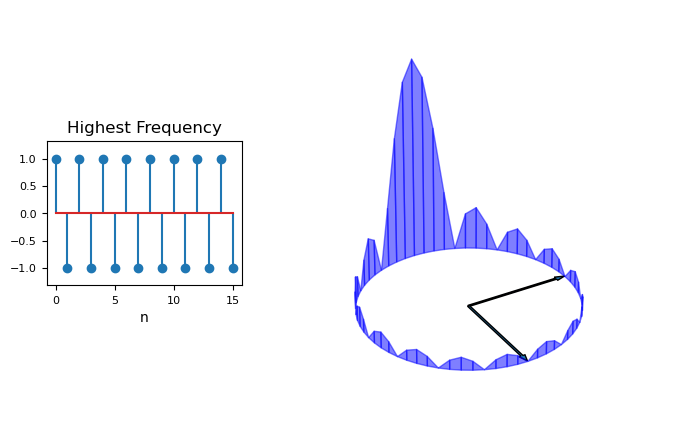

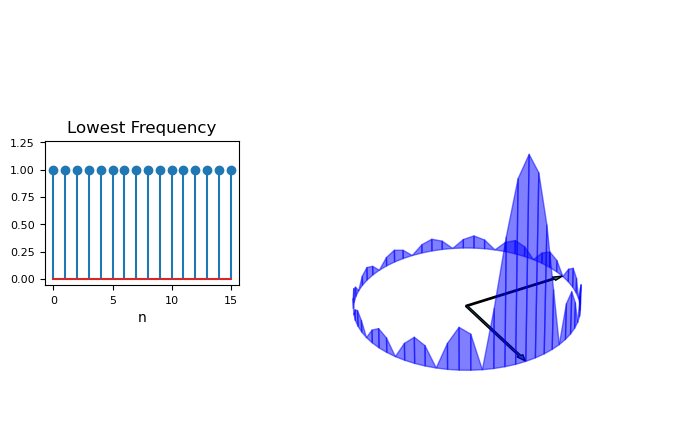

In [13]:
#3.5
v = np.matrix(np.cos(np.pi*np.arange(0,16))).T
ax1,ax2=drawInOut(U.H*v,v,return_axes=1)
ax1.set_title("Highest Frequency")
v = np.ones((16,1))
ax1,ax2=drawInOut(U.H*v,v,return_axes=1)
ax1.set_title("Lowest Frequency")


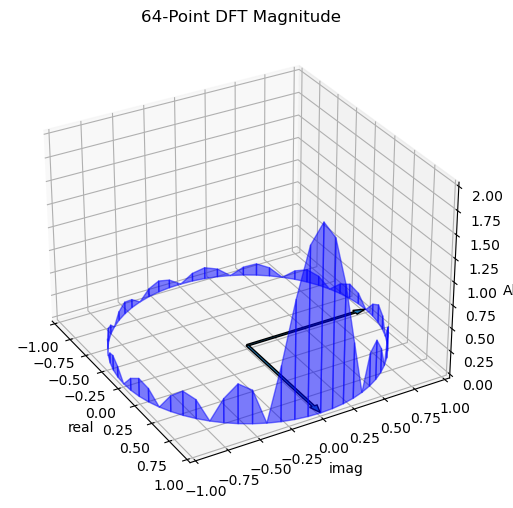

In [11]:
#3.6
a=2*np.pi/64.*np.arange(64)
d=np.vstack([np.cos(a),np.sin(a),np.array(abs(X)).flatten()]).T
fig = plt.figure()
fig.set_size_inches(6,6)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.axis([-1,1,-1,1])
ax.set_zlim([0,d[:,2].max()])
ax.set_aspect('auto')
ax.view_init(azim=-30)
ax.set_xlabel('real')
ax.set_ylabel('imag')
ax.set_zlabel('Abs')
ax.set_title('64-Point DFT Magnitude')
def facet_filled(x,alpha=0.5,color='b'):
    'construct 3D facet from adjacent points filled to zero'
    a,b=x
    a0= a*np.array([1,1,0])
    b0= b*np.array([1,1,0])
    ve =np.vstack([a,a0,b0,b]) # create closed polygon facet
    poly = Poly3DCollection([ve]) # create facet
    poly.set_alpha(alpha)
    poly.set_color(color)
    return poly
sl=[slice(i,i+2) for i in range(d.shape[0]-2)] # collect neighboring points
for s in sl:
    poly=facet_filled(d[s,:])
    ax.add_collection3d(poly)
# edge polygons
ax.add_collection3d(facet_filled(d[[-1,0],:]))
ax.add_collection3d(facet_filled(d[[-2,-1],:]))
# add 0 and pi/2 arrows for reference
a=FancyArrow(0,0,1,0,width=0.02,length_includes_head=True)
ax.add_patch(a)
b=FancyArrow(0,0,0,1,width=0.02,length_includes_head=True)
ax.add_patch(b)
art3d.patch_2d_to_3d(a)
art3d.patch_2d_to_3d(b)
plt.show()